# SALES PREDICTION USING PYTHON

It is used to predict how much sales will happen for a product in future. For this we will use Linear regressor as a Machine Learning Model.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.drop("Unnamed: 0", axis =1, inplace =True)

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24')])

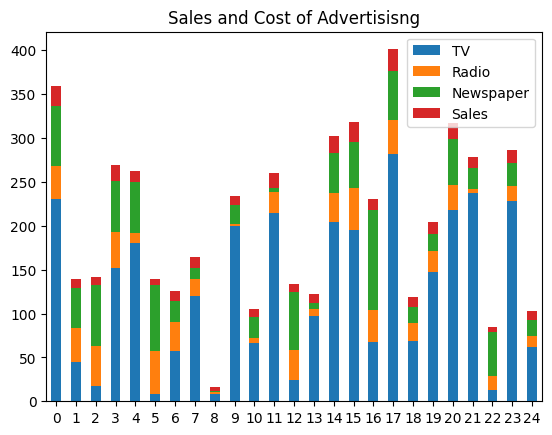

In [11]:
# STACKED BARGRAPh
df1 = df.head(25)

df1.plot(kind ="bar", stacked =True)
plt.title('Sales and Cost of Advertisisng')
plt.xticks(rotation=0, ha='center')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350')])

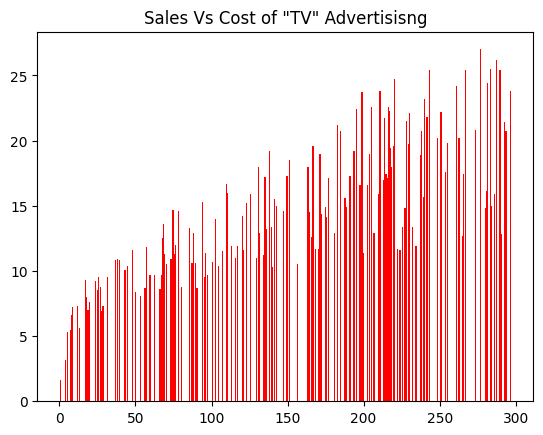

In [19]:
plt.bar(df.TV, df.Sales, color = "Red")
plt.title('Sales Vs Cost of "TV" Advertisisng')

plt.xticks(rotation=0, ha='center')

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

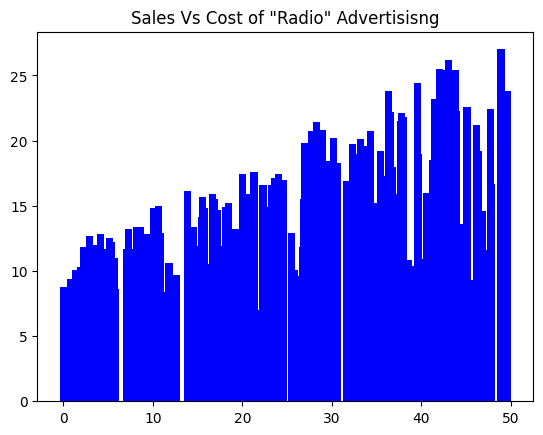

In [20]:
plt.bar(df.Radio, df.Sales, color = "Blue")
plt.title('Sales Vs Cost of "Radio" Advertisisng')

plt.xticks(rotation=0, ha='center')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140')])

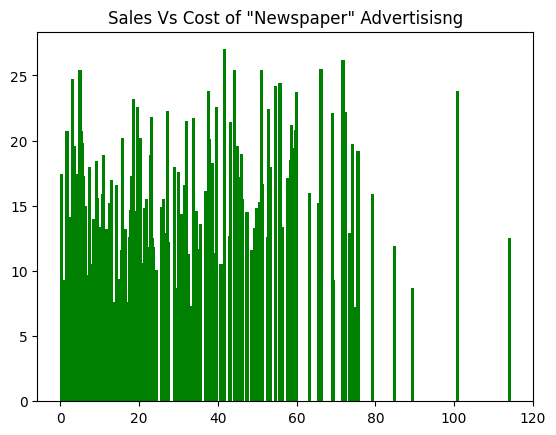

In [21]:
plt.bar(df.Newspaper, df.Sales, color = "Green")
plt.title('Sales Vs Cost of "Newspaper" Advertisisng')

plt.xticks(rotation=0, ha='center')

<Figure size 640x480 with 0 Axes>

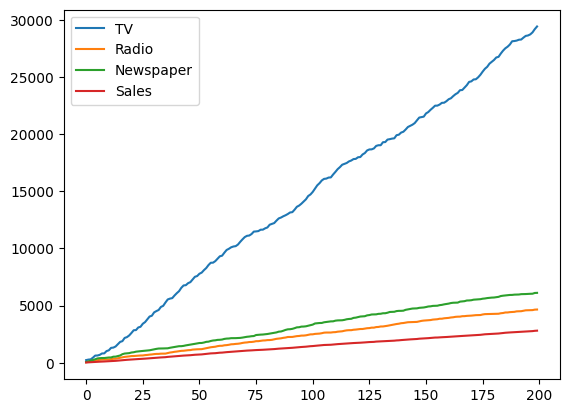

In [22]:
# Pie Chart
df = df.cumsum()

plt.figure();

df.plot();

So from the analysis we come to know that the cost for advertisisng is very high comparing to Sales. Also Cost of Advertising through TV is much higher than Radio and Newspaper Marketing.

It shows that to have more increase in sales company needs to ioncrease advertisement through "TV".


### Model Building

In [28]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
x = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25, random_state=0)

In [32]:
model = LinearRegression()

model.fit(x_train,y_train)

y_predict = model.predict(x_test)

In [33]:
print(model.intercept_)
print(model.coef_)

-4.011748239357303
[ 0.05431624  0.26872944 -0.00714079]


In [34]:
act_predict = pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predict.flatten()
})
act_predict.head(20)

,Actual,Predict
0,255.3,254.402034
1,2395.4,2400.810005
2,1567.1,1559.653841
3,1429.1,1420.354719
4,2499.6,2505.665895
5,2555.4,2559.341603
6,80.4,87.873596
7,2076.2,2073.123128
8,156.0,157.093697
9,2166.9,2165.299554


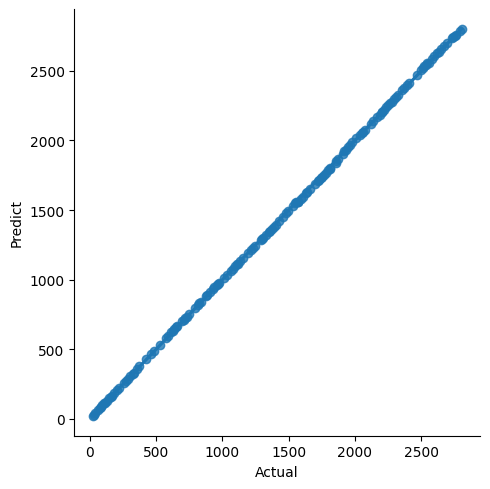

In [35]:
sns.lmplot(data = act_predict,x='Actual',y="Predict")

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error:",mean_squared_error(y_test,y_predict))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_predict)))
print("r2_score:",r2_score(y_test,y_predict))


Mean_absolute_error: 4.77196517510193
Mean_squared_error: 37.26034343450685
Squre_Mean_absolute_error: 2.1844828163897123
r2_score: 0.9999444267242449
